In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
df  = pd.read_csv(r"C:\Users\deeksha\scores_data.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [12]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [16]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

### Renaming the column names with proper names after removing the spaces

In [23]:
df.rename(columns = {'Batch ': 'Batch', 'User_ID ':'User_ID', '   Score   ':'Score'}, inplace= True)

In [24]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [29]:
df["Batch"].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [35]:
df["Score"]

0      6 / 7
1      6 / 7
2      7 / 7
3      7 / 7
4      4 / 7
       ...  
144    4 / 7
145    4 / 7
146    4 / 7
147    3 / 7
148    2 / 7
Name: Score, Length: 149, dtype: object

### Creating a column with only the score values

In [57]:
df["Scores"] = df["Score"].str.split("/", expand = True)[0]

In [59]:
df.head()

,Batch,User_ID,Score,Scores
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


In [60]:
df["Scores"] = df["Scores"].astype(float)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batch    149 non-null    object 
 1   User_ID  149 non-null    object 
 2   Score    149 non-null    object 
 3   Scores   149 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


In [91]:
df["Scores"].mean()

4.382550335570469

In [92]:
df["Scores"].median()

4.0

In [93]:
df["Scores"].mode()

0    4.0
Name: Scores, dtype: float64

In [112]:
df.groupby("Batch")["Scores"].max()

Batch
AI_ELITE_4    7.0
AI_ELITE_6    7.0
AI_ELITE_7    7.0
Name: Scores, dtype: float64

In [113]:
df.groupby("Batch")["Scores"].min()

Batch
AI_ELITE_4    0.0
AI_ELITE_6    0.0
AI_ELITE_7    2.0
Name: Scores, dtype: float64

### Visualization EDA:

(array([ 2.,  3., 12.,  0., 24., 40.,  0., 32., 18., 18.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

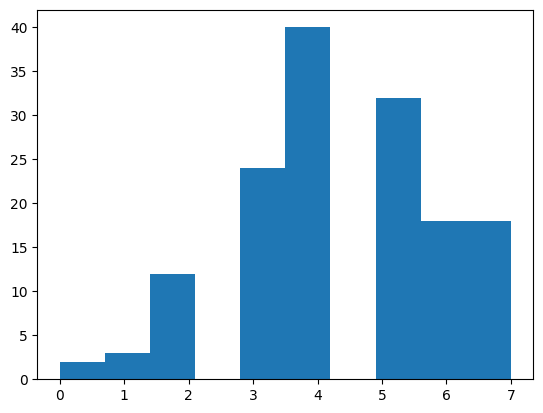

In [82]:
plt.hist(df["Scores"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1929dda07d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1929ddd8e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1929ddb3150>],
 'medians': [<matplotlib.lines.Line2D at 0x1929ddd9f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1929dcc2750>],
 'means': []}

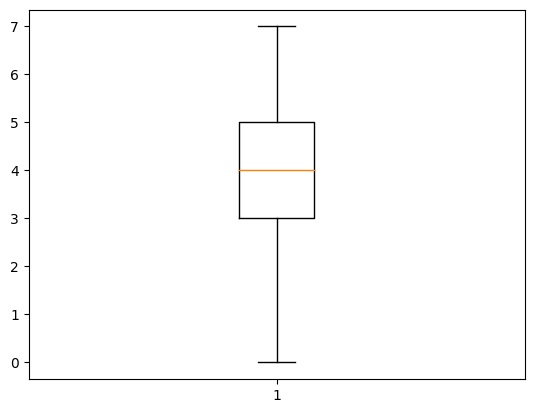

In [83]:
plt.boxplot(df["Scores"])

<Axes: xlabel='Scores', ylabel='Density'>

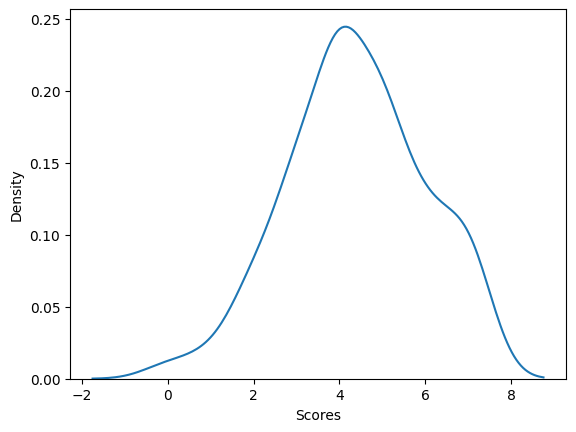

In [86]:
sns.kdeplot(df["Scores"])

###### We can conclude from the above graph that the Scores data almost follows a normal distribution.

<Axes: >

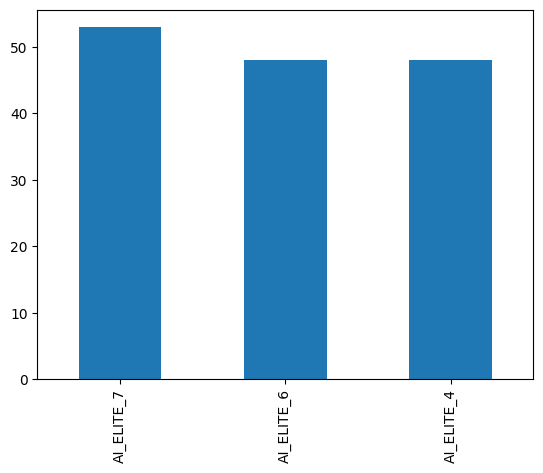

In [64]:
df["Batch"].value_counts().plot(kind='bar')`

###### The above graph shows that the count of AI_ELITE_7 BAtch is more than the other two Batches.

([<matplotlib.patches.Wedge at 0x1929dce9450>,
 [Text(0.48174498010486017, 0.9888992740131666, 'AI_ELITE_7'),
  Text(-1.093893010945477, -0.11575007820575742, 'AI_ELITE_6'),
  Text(0.5831295809449851, -0.9327164048235274, 'AI_ELITE_4')],
 [Text(0.2627699891481055, 0.5393996040071817, '35.57'),
  Text(-0.5966689150611691, -0.06313640629404949, '32.21'),
  Text(0.3180706805154464, -0.5087544026310149, '32.21')])

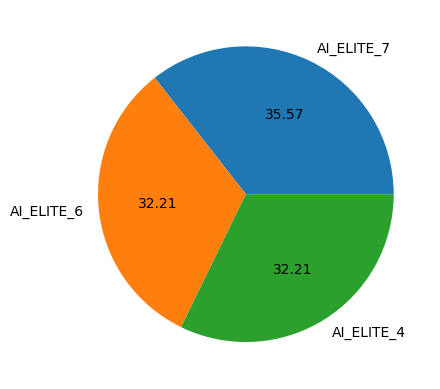

In [81]:
df_1 = df["Batch"].value_counts()
plt.pie(df_1, labels = df_1.index, autopct = "%.2f")

Let us count the average score of each batch since the count of one batch is more than the other two.

In [110]:
df.groupby("Batch")["Scores"].sum()

Batch
AI_ELITE_4    182.0
AI_ELITE_6    203.0
AI_ELITE_7    268.0
Name: Scores, dtype: float64

In [111]:
df.groupby("Batch").size()

Batch
AI_ELITE_4    48
AI_ELITE_6    48
AI_ELITE_7    53
dtype: int64

In [106]:
df.groupby("Batch")["Scores"].sum()/df.groupby("Batch").size()

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
dtype: float64

In [101]:
df["Avg_Scores"] = df.groupby("Batch")["Scores"].transform("sum")/df.groupby("Batch").transform("size")

In [102]:
df.head()

,Batch,User_ID,Score,Scores,Avg_Scores
0,AI_ELITE_7,uid_149,6 / 7,6.0,5.056604
1,AI_ELITE_7,uid_148,6 / 7,6.0,5.056604
2,AI_ELITE_7,uid_147,7 / 7,7.0,5.056604
3,AI_ELITE_7,uid_146,7 / 7,7.0,5.056604
4,AI_ELITE_7,uid_145,4 / 7,4.0,5.056604


<Axes: xlabel='Batch', ylabel='Avg_Scores'>

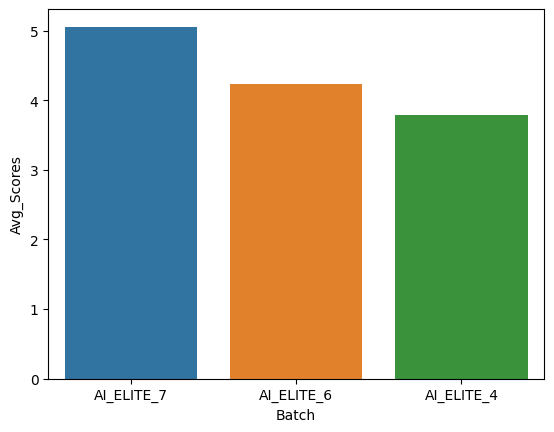

In [105]:
sns.barplot(x = df["Batch"], y = df["Avg_Scores"])

<Axes: xlabel='Batch', ylabel='Scores'>

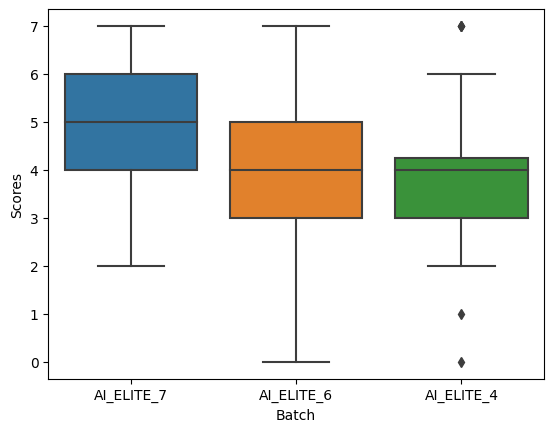

In [89]:
sns.boxplot(x = df["Batch"], y = df["Scores"])

<Axes: xlabel='Batch', ylabel='Avg_Scores'>

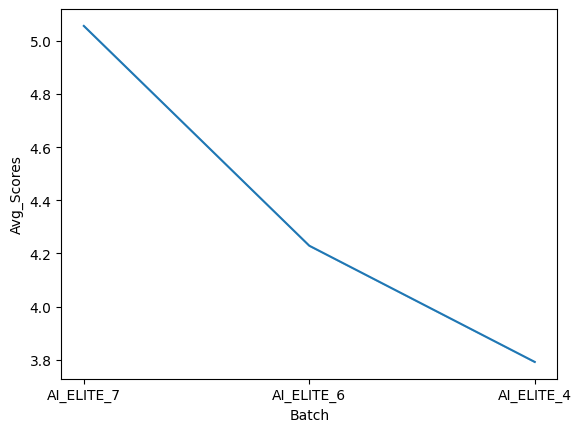

In [107]:
sns.lineplot(x = df["Batch"], y = df["Avg_Scores"])

#### Conclusion:

The Batch AI_ELITE_7 has the maximum average scores.